## K-Means

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [9]:
data=pd.read_csv("/home/student/Desktop/Practise_Folder/Project/Data/zomatoNCR.csv",encoding='latin-1')
data =data.loc[data['Country Code'] == 1]
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(data[['Longitude', 'Latitude']])
data['pos'] = kmeans.labels_

pop_local = data.groupby('pos')['Longitude', 'Latitude', 'Aggregate rating'].agg({'Longitude':np.mean, 'Latitude':np.mean, 'Aggregate rating':np.median}).reset_index()



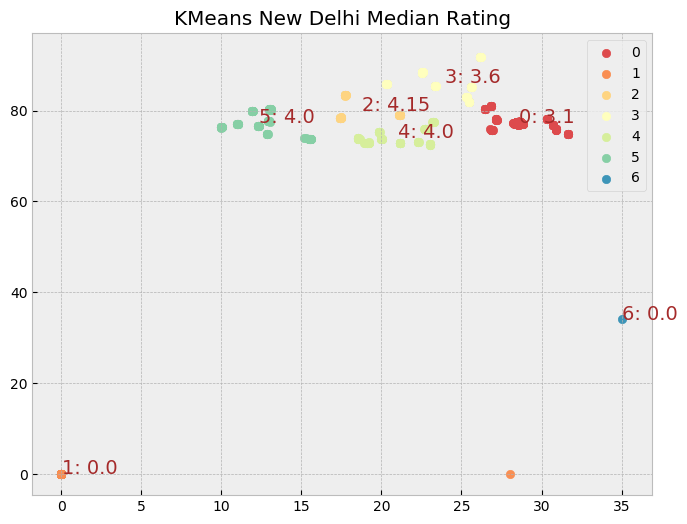

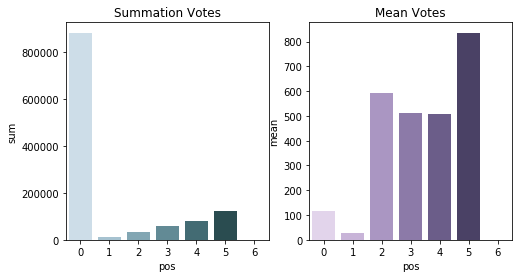

In [11]:
 %matplotlib inline
with plt.style.context('bmh', after_reset=True):
    pal = sns.color_palette('Spectral', 7)
    plt.figure(figsize = (8,6))
    for i in range(7):
        ix = data.pos == i
        plt.scatter(data.loc[ix, 'Latitude'], data.loc[ix, 'Longitude'], color = pal[i], label = str(i))
        plt.text(pop_local.loc[i, 'Latitude'], pop_local.loc[i, 'Longitude'], str(i) + ': '+str(pop_local.loc[i, 'Aggregate rating'].round(2)), fontsize = 14, color = 'brown')
    plt.title('KMeans New Delhi Median Rating')
    plt.legend()
    plt.show()
    
votes_area = data.groupby('pos').agg({'Votes': [np.sum, np.mean]})
votes_area.columns = votes_area.columns.droplevel(0)
votes_area.reset_index(inplace = True)
plt.figure(figsize = (8,4))
ax = plt.subplot(1,2,1)
sns.barplot(x = 'pos', y = 'sum', data =votes_area, palette = sns.cubehelix_palette(n_colors = 7, start = 2.4, rot = .1), ax = ax)
ax.set_title('Summation Votes')

ax = plt.subplot(1,2,2)
sns.barplot(x = 'pos', y = 'mean', data =votes_area, palette = sns.cubehelix_palette(n_colors = 7, start = 3, rot = .1), ax = ax)
ax.set_title('Mean Votes')
plt.show()